# Importation des librairies nécessaires

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# SCIKIT-LEARN: SELECTION DE VARIABLES

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.ensemble import RandomForestClassifier

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer 
from sklearn_pandas import DataFrameMapper

# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, roc_curve, auc

# SMOTE
from imblearn.over_sampling import SMOTE

# SCIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # Séparer en données train et test
from sklearn.model_selection import cross_val_score # Validation croisée pour comparison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation : visulaisr des scores lors du choix d'un hyper-paramètre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyper-paramètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage : visualisation des scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEURll
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

# YELLOWBRICK
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve

# Importation des modules

In [2]:
# Configuration du chemin d'accès
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Importations des modules nécessaires
import data_loader
import preprocessing
import modeling
import evaluation
import cleaning

# Chargement des données

In [3]:
# Charger les données
data_path = '../data/smoking_driking_dataset_Ver01.csv'
data = data_loader.load_data(data_path)
df_smoking_drinking = data.copy()

# Nettoyage des données

## Type des variables

In [4]:
intToFloat = ['age', 'height', 'weight']
floatToInt = ['hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd']

In [5]:
cleaning.convertType(df_smoking_drinking, intToFloat, floatToInt)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35.0,170.0,75.0,90.0,1.0,1.0,1,1,120.0,...,126.0,92.0,17.1,1,1.0,21.0,35.0,40.0,1,Y
1,Male,30.0,180.0,80.0,89.0,0.9,1.2,1,1,130.0,...,148.0,121.0,15.8,1,0.9,20.0,36.0,27.0,3,N
2,Male,40.0,165.0,75.0,91.0,1.2,1.5,1,1,120.0,...,74.0,104.0,15.8,1,0.9,47.0,32.0,68.0,1,N
3,Male,50.0,175.0,80.0,91.0,1.5,1.2,1,1,145.0,...,104.0,106.0,17.6,1,1.1,29.0,34.0,18.0,1,N
4,Male,50.0,165.0,60.0,80.0,1.0,1.2,1,1,138.0,...,117.0,104.0,13.8,1,0.8,19.0,12.0,25.0,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45.0,175.0,80.0,92.1,1.5,1.5,1,1,114.0,...,125.0,132.0,15.0,1,1.0,26.0,36.0,27.0,1,N
991342,Male,35.0,170.0,75.0,86.0,1.0,1.5,1,1,119.0,...,84.0,45.0,15.8,1,1.1,14.0,17.0,15.0,1,N
991343,Female,40.0,155.0,50.0,68.0,1.0,0.7,1,1,110.0,...,77.0,157.0,14.3,1,0.8,30.0,27.0,17.0,3,Y
991344,Male,25.0,175.0,60.0,72.0,1.5,1.0,1,1,119.0,...,73.0,53.0,14.5,1,0.8,21.0,14.0,17.0,1,N


In [6]:
df_smoking_drinking.dtypes

sex                  object
age                 float64
height              float64
weight              float64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

In [7]:
cont_features = df_smoking_drinking.select_dtypes(include=['float64']).columns
cat_features = df_smoking_drinking.select_dtypes(include=['object', 'int64']).columns
cat_features = cat_features.drop(['SMK_stat_type_cd', 'DRK_YN'])

## Outliers

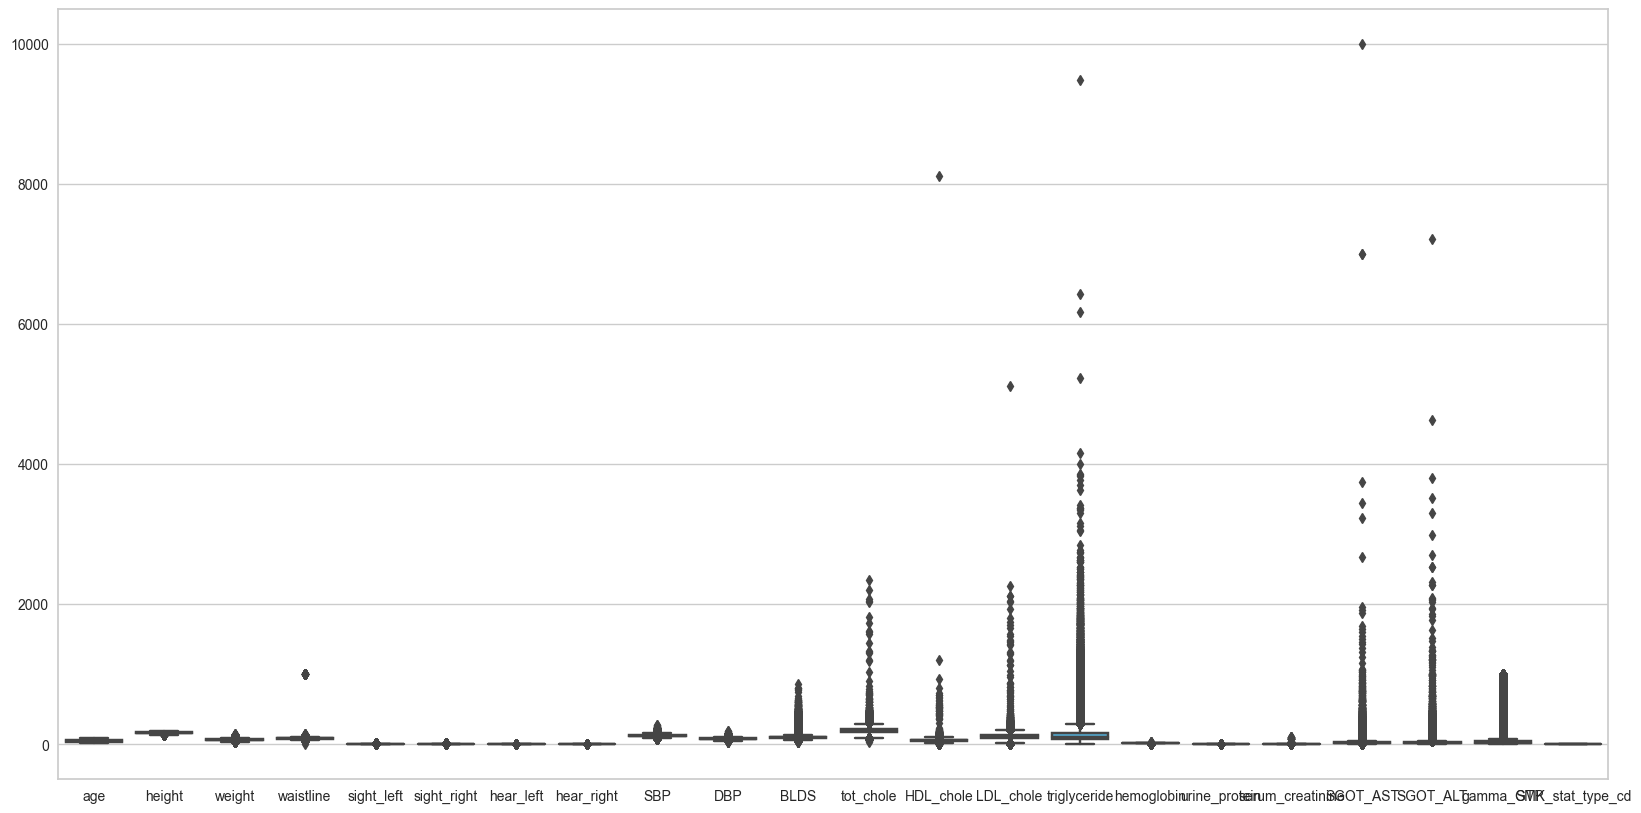

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_smoking_drinking)
plt.show()

In [10]:
col_limits = {
    'triglyceride': 4000,
    'LDL_chole': 4000,
    'HDL_chole': 4000,
    'SGOT_AST': 4000,
    'SGOT_ALT': 4000
}

# Filtrer les outliers
df_smoking_drinking = cleaning.filter_outliers(df_smoking_drinking, col_limits)

# Séparation données train / test

In [16]:
X = df_smoking_drinking.drop(columns=['SMK_stat_type_cd', 'DRK_YN'])
y = df_smoking_drinking['SMK_stat_type_cd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
y_train.value_counts(), y_test.value_counts()

(SMK_stat_type_cd
 1    481950
 3    171158
 2    139960
 Name: count, dtype: int64,
 SMK_stat_type_cd
 1    120488
 3     42789
 2     34990
 Name: count, dtype: int64)

## Sélection de variables

### Validation croisée pour avoir la meilleure valeur de k features à retenir

Best k: 19
Best cross-validation score: 0.6797295945550604


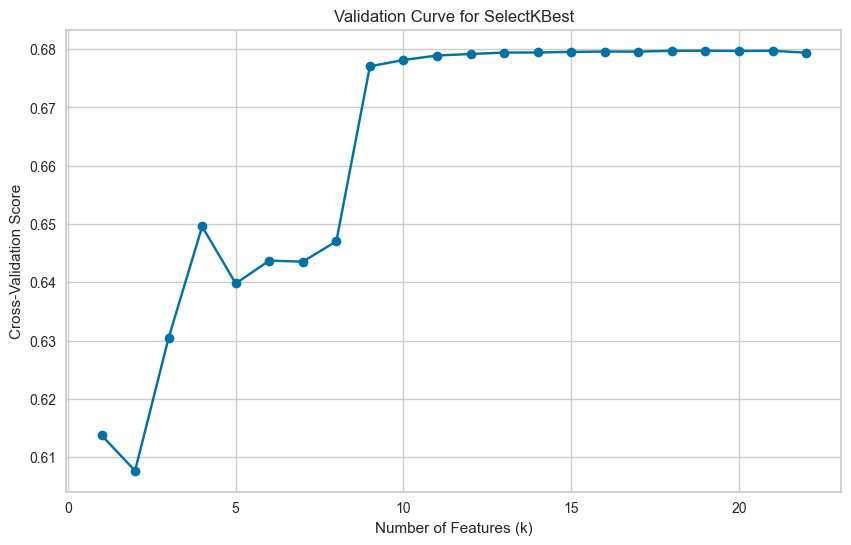

In [45]:
def preprocess_data(X_train, X_test, cont_features, cat_features):
    # Preprocess numerical features
    cont_preprocessor = make_pipeline(StandardScaler())
    
    # Preprocess categorical features
    cat_preprocessor = make_pipeline(OrdinalEncoder())
    
    preprocessor = make_column_transformer((cont_preprocessor, cont_features),
                                           (cat_preprocessor, cat_features),
                                           remainder='drop')
    
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    
    return X_train_prep, X_test_prep, preprocessor

def select_best_k(X_train, y_train, preprocessor, k_values):
    best_score = 0
    best_k = 0
    
    for k in k_values:
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        
        model = LogisticRegression()
        scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='f1_weighted')
        mean_score = np.mean(scores)
        
        if mean_score > best_score:
            best_score = mean_score
            best_k = k
            
    return best_k, best_score

def plot_validation_curve(X_train, y_train, preprocessor, k_values):
    scores = []
    
    for k in k_values:
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        
        model = LogisticRegression()
        cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='f1_weighted')
        scores.append(np.mean(cv_scores))
        
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, scores, marker='o')
    plt.xlabel('Number of Features (k)')
    plt.ylabel('Cross-Validation Score')
    plt.title('Validation Curve for SelectKBest')
    plt.grid(True)
    plt.show()

# Prétraiter les données
X_train_prep, X_test_prep, preprocessor = preprocess_data(X_train, X_test, cont_features, cat_features)

# Définir les valeurs de k à tester
k_values = range(1, X_train_prep.shape[1] + 1)

# Sélectionner le meilleur k
best_k, best_score = select_best_k(X_train_prep, y_train, preprocessor, k_values)

print(f"Best k: {best_k}")
print(f"Best cross-validation score: {best_score}")

# Tracer la courbe de validation
plot_validation_curve(X_train_prep, y_train, preprocessor, k_values)

### Sélection

In [46]:
def preprocess_data(X_train, X_test, cont_features, cat_features, target, k):
    # Preprocess numerical features
    cont_preprocessor = make_pipeline(StandardScaler())
    
    # Preprocess categorical features
    cat_preprocessor = make_pipeline(OrdinalEncoder())
    
    preprocessor = make_column_transformer((cont_preprocessor, cont_features),
                                           (cat_preprocessor, cat_features),
                                           remainder='drop')
    
    # Fit and transform the training data
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    
    # SelectKBest to select the top k features
    selector = SelectKBest(score_func=f_classif, k=k)    
    X_train_selected = selector.fit_transform(X_train_prep, target)
    X_test_selected = selector.transform(X_test_prep)
    
    # Get the selected feature names
    selected_features = selector.get_support(indices=True)
    feature_names = preprocessor.get_feature_names_out()
    selected_feature_names = [feature_names[i] for i in selected_features]

    print("Selected feature names:", selected_feature_names)
    
    return X_train_selected, X_test_selected

In [47]:
# Nombre de caractéristiques à sélectionner
k = 19

X_train_prep, X_test_prep = preprocess_data(X_train, X_test, cont_features, cat_features, y_train, k)

Selected feature names: ['pipeline-1__age', 'pipeline-1__height', 'pipeline-1__weight', 'pipeline-1__waistline', 'pipeline-1__sight_left', 'pipeline-1__sight_right', 'pipeline-1__SBP', 'pipeline-1__DBP', 'pipeline-1__BLDS', 'pipeline-1__HDL_chole', 'pipeline-1__triglyceride', 'pipeline-1__hemoglobin', 'pipeline-1__serum_creatinine', 'pipeline-1__SGOT_AST', 'pipeline-1__SGOT_ALT', 'pipeline-1__gamma_GTP', 'pipeline-2__sex', 'pipeline-2__hear_left', 'pipeline-2__hear_right']


# Prétraitement (inclus dans la sélection)

In [24]:
# def preprocess_data(X_train, X_test, cont_features, cat_features):
#     # Preprocess numerical features
#     cont_preprocessor = make_pipeline(StandardScaler())
    
#     # Preprocess categorical features
#     cat_preprocessor = make_pipeline(OrdinalEncoder())
    
#     preprocessor = make_column_transformer((cont_preprocessor, cont_features),
#                                             (cat_preprocessor, cat_features),
#                                             remainder='drop')
    
#     X_train_prep = preprocessor.fit_transform(X_train)
#     X_test_prep = preprocessor.transform(X_test)
    
#     return X_train_prep, X_test_prep

In [25]:
# X_train_prep, X_test_prep = preprocess_data(X_train, X_test, cont_features, cat_features)

# Modélisation

In [48]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap='Blues', figsize=(10, 7)):
    """
    Plots a confusion matrix using matplotlib.
    
    Parameters:
    y_true : array-like of shape (n_samples,)
        True labels.
    y_pred : array-like of shape (n_samples,)
        Predicted labels.
    classes : array-like of shape (n_classes,)
        List of class labels.
    cmap : str, default='Blues'
        Colormap for the heatmap.
    figsize : tuple, default=(10, 7)
        Figure size.
    """
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    
    # Créer une figure et un axe
    fig, ax = plt.subplots(figsize=figsize)
    
    # Créer une heatmap
    cax = ax.matshow(cm, cmap=cmap)
    
    # Ajouter une barre de couleur
    fig.colorbar(cax)
    
    # Annoter la heatmap avec les valeurs de la matrice de confusion
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')
    
    # Définir les labels des axes
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticklabels(classes)
    
    # Définir les labels des axes et le titre
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    
    # Afficher la heatmap
    plt.show()

In [49]:
def evaluate_model_multiclass(y_true, y_pred, class_labels):
    """
    Evaluate a multi-class classification model using confusion matrix, classification metrics, 
    and ROC AUC.

    Args:
        y_true (array): True class labels.
        y_pred (array): Predicted class labels.
        class_labels (array): List of class labels.
    """
    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, classes=class_labels)

    # Calculate classification metrics
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Display classification metrics
    print("*** Classification Metrics ***")
    print("Precision =", precision)
    print("Recall =", recall)
    print("F1 Score =", f1)
    print("******************************")


    # Binarize the output
    y_onehot_test = label_binarize(y_true, classes=class_labels)
    y_score = label_binarize(y_pred, classes=class_labels)

    # ROC AUC for multi-class classification
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(len(class_labels)):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        plt.plot(fpr[i], tpr[i], label='Class %d (AUC=%0.3f)' % (i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Multi-class ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    # Print AUC scores for each class
    print("AUC scores for each class:", roc_auc)

    # Calculate micro-average ROC AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot micro-average ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (AUC = %0.3f)' % roc_auc["micro"], color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Micro-averaged ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    # Print micro-average ROC AUC
    print("Micro-average ROC AUC:", roc_auc["micro"])

    # Calculate average ROC AUC
    mean_auc = np.mean(list(roc_auc.values()))

    # Print average ROC AUC
    print("Mean ROC AUC:", mean_auc)

# Régression logistique 

In [59]:
# Modèles
logreg = LogisticRegression(penalty=None, tol=10e-6, random_state=42)
logregRidge = LogisticRegression(C=0.1, penalty='l2', tol=10e-6, random_state=42)
logregLasso = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', tol=10e-6, random_state=42)
logregElasticNet = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.7, tol=10e-6, random_state=42)

In [60]:
# Créer et entraîner un modèle de régression logistique

logreg.fit(X_train_prep, y_train)

LogisticRegression(penalty=None, random_state=42, tol=1e-05)

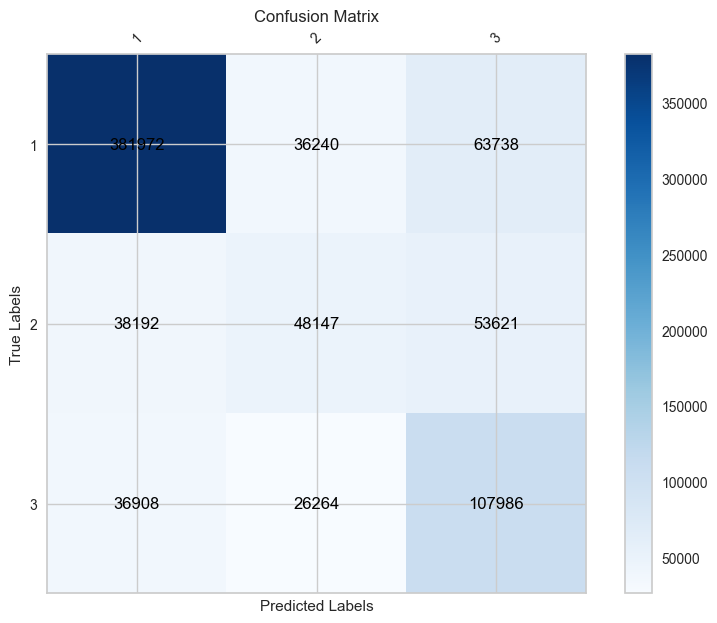

*** Classification Metrics ***
Precision = 0.6880644267780958
Recall = 0.6785105438625691
F1 Score = 0.6797626076439992
******************************


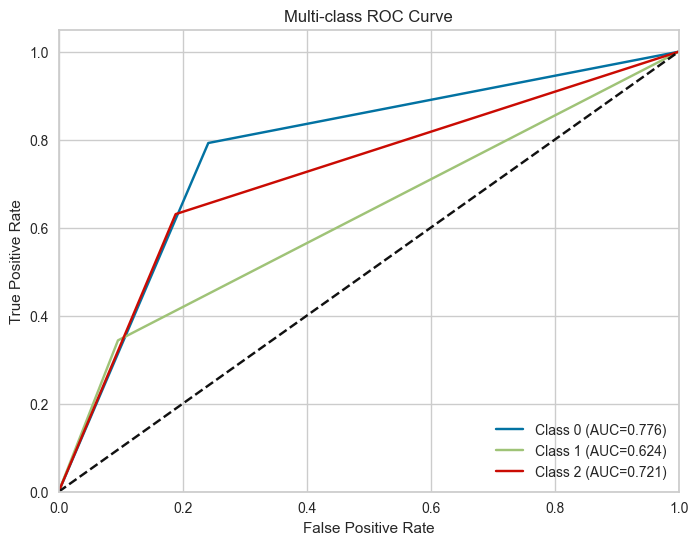

AUC scores for each class: {0: 0.7755838660931451, 1: 0.6241515174034784, 2: 0.7211033784477916}


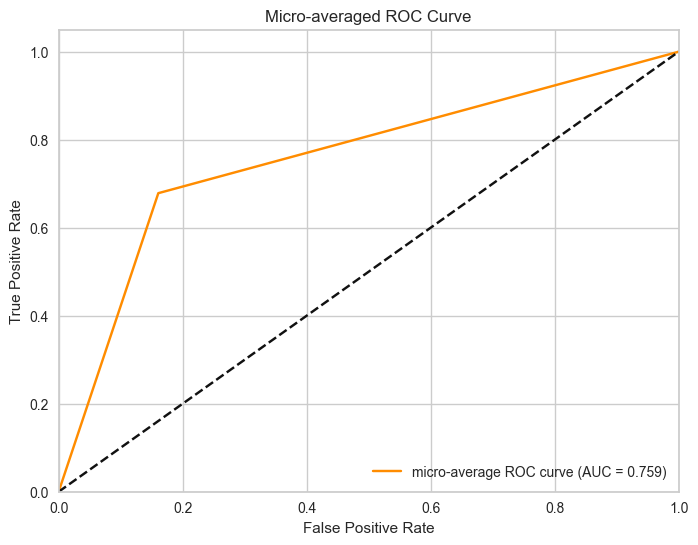

Micro-average ROC AUC: 0.7588829078969268
Mean ROC AUC: 0.7199304174603355


In [61]:
# Evaluer le modèle sur les données train
y_train_pred = logreg.predict(X_train_prep)
evaluate_model_multiclass(y_train, y_train_pred, logreg.classes_)

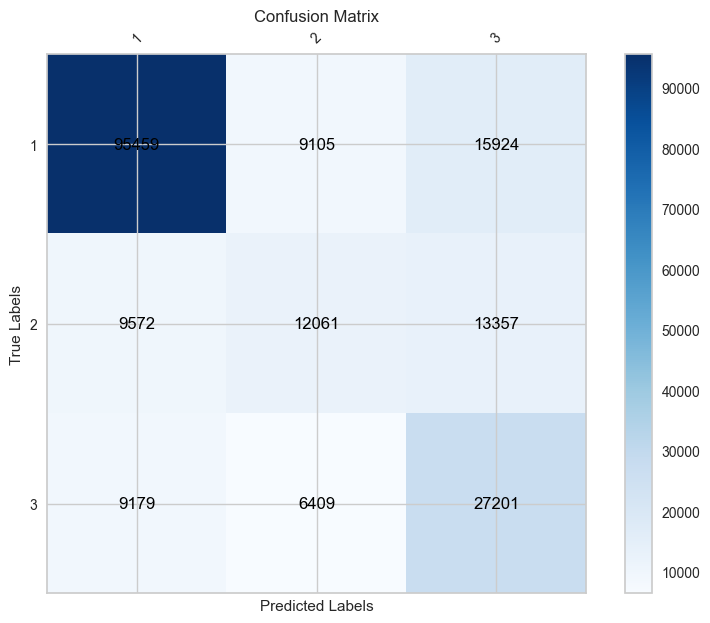

*** Classification Metrics ***
Precision = 0.6890564001541445
Recall = 0.6794928051566826
F1 Score = 0.6806574166554623
******************************


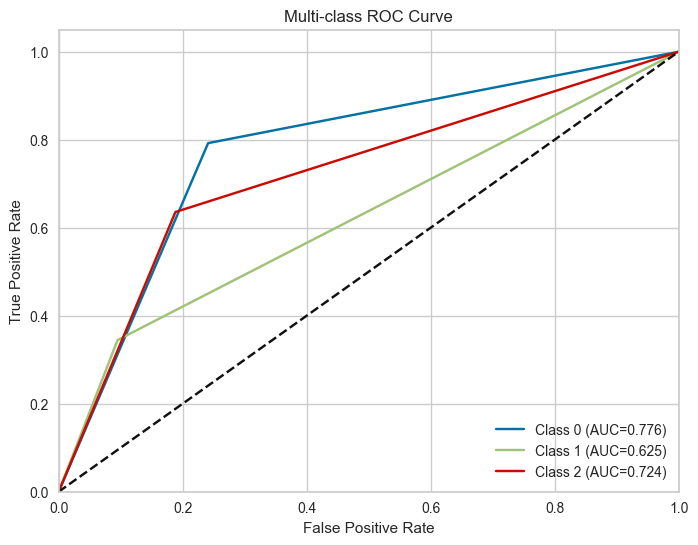

AUC scores for each class: {0: 0.7755946361485706, 1: 0.6248410204171713, 2: 0.7236859344043389}


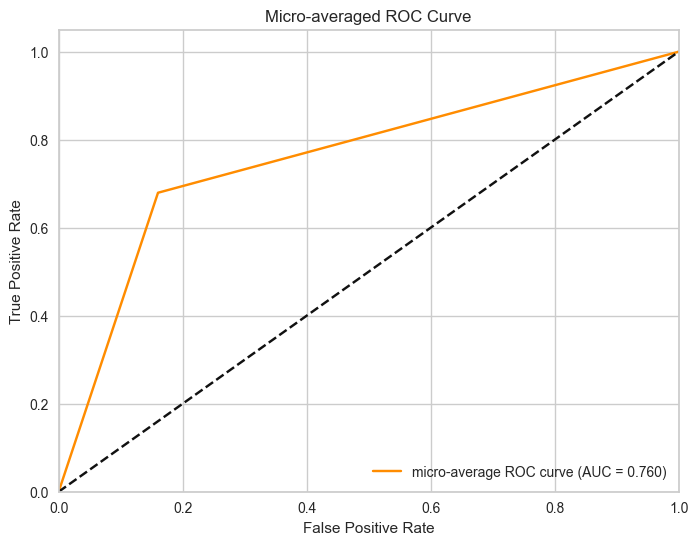

Micro-average ROC AUC: 0.759619603867512
Mean ROC AUC: 0.7209352987093982


In [62]:
# Evaluer le modèle sur les données test
y_test_pred = logreg.predict(X_test_prep)
evaluate_model_multiclass(y_test, y_test_pred, logreg.classes_)

<font color='red'>**Commentaire**</font> 

La classe 2 a le plus mauvais score entre les trois. C'est aussi la classe la moins représentée. Nous allons tenter un sur-échantillonnage pour améliorer les résultats. 

### Sur échantillonnage

In [53]:
# Suréchantillonnage des données avec SMOTE
smote = SMOTE(random_state=42)
X_train_up, y_train_up = smote.fit_resample(X_train_prep, y_train)

In [63]:
# Ajuster le modèle de régression logistique sur les données suréchantillonnées
logreg_up = LogisticRegression()
logreg_up.fit(X_train_up, y_train_up)

LogisticRegression()

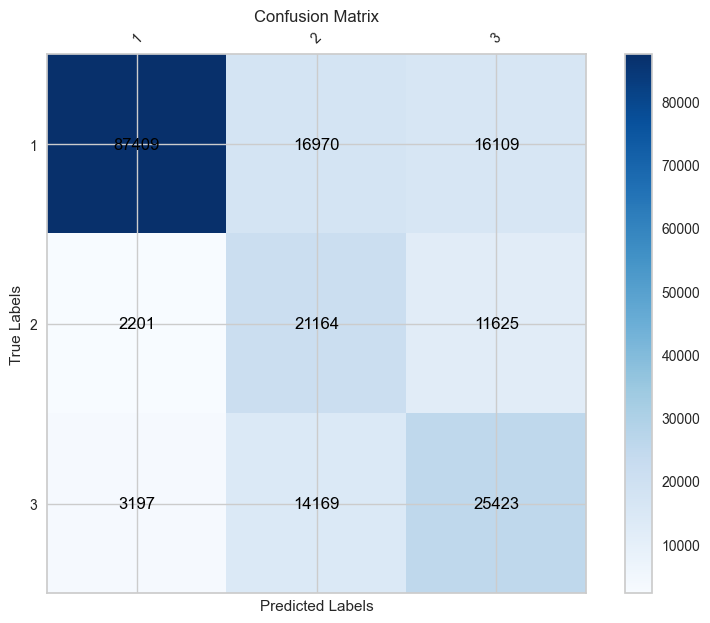

*** Classification Metrics ***
Precision = 0.7469865102945326
Recall = 0.6758361199796235
F1 Score = 0.6980235586496633
******************************


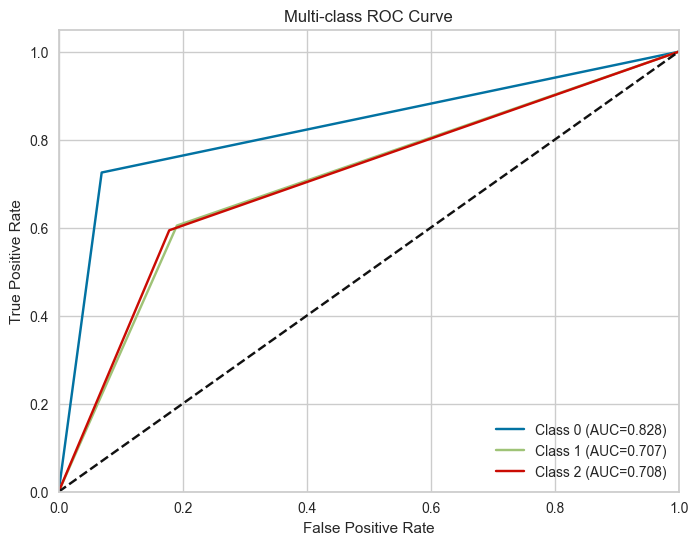

AUC scores for each class: {0: 0.8280281851831155, 1: 0.7070729079035429, 2: 0.707884547029347}


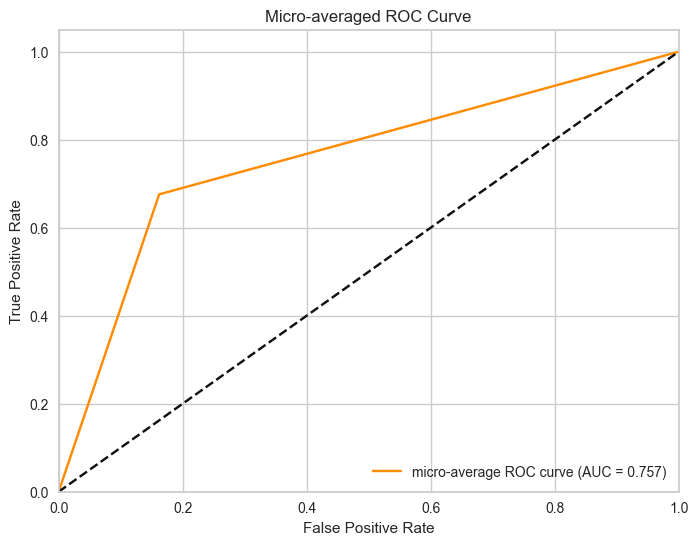

Micro-average ROC AUC: 0.7568770899847176
Mean ROC AUC: 0.7499656825251808


In [55]:
# Prédiction sur les données test et évaluation
y_test_pred_up = logreg_up.predict(X_test_prep)
evaluate_model_multiclass(y_test, y_test_pred_up, logreg_up.classes_)

<font color='red'>**Commentaire**</font> 

Le SMOTE a amélioré la précision de 0,5 mais le score F1 (qui nous intéresse surtout ici) n'a pas tant changé (+0,1). Voyons si l'ajout d'une pénalité améliore les résultats.

## Régression logistique + pénalité

In [70]:
dict_models = {
    'Logistic Regression': logreg,
    'Logistic Regression (Ridge)': logregRidge,
    'Logistic Regression (Lasso)': logregLasso,
    'Logistic Regression (Elastic Net)': logregElasticNet
}

*** Logistic Regression (Ridge) ***


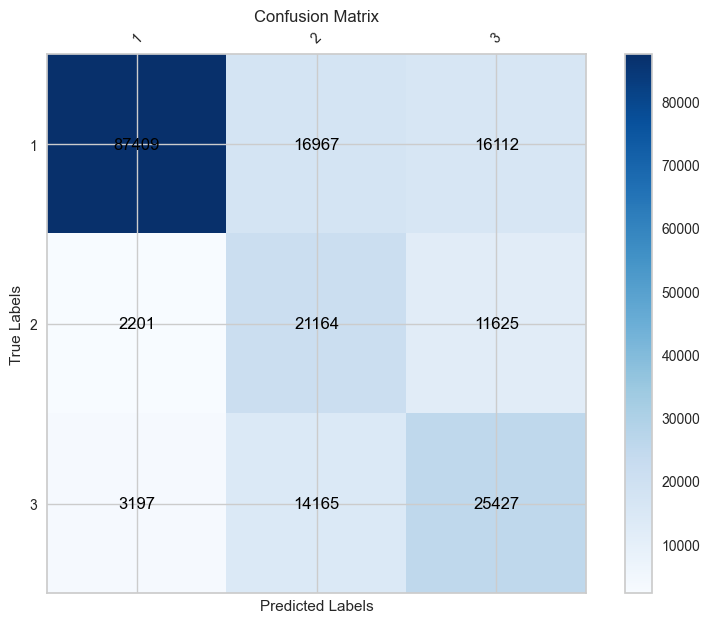

*** Classification Metrics ***
Precision = 0.7469987162949566
Recall = 0.6758562947943935
F1 Score = 0.6980400711952146
******************************


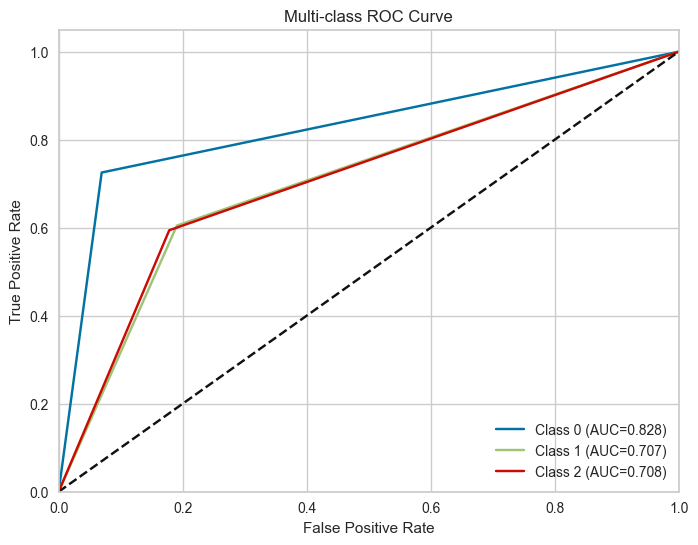

AUC scores for each class: {0: 0.8280281851831155, 1: 0.707094343868192, 2: 0.7079216403469855}


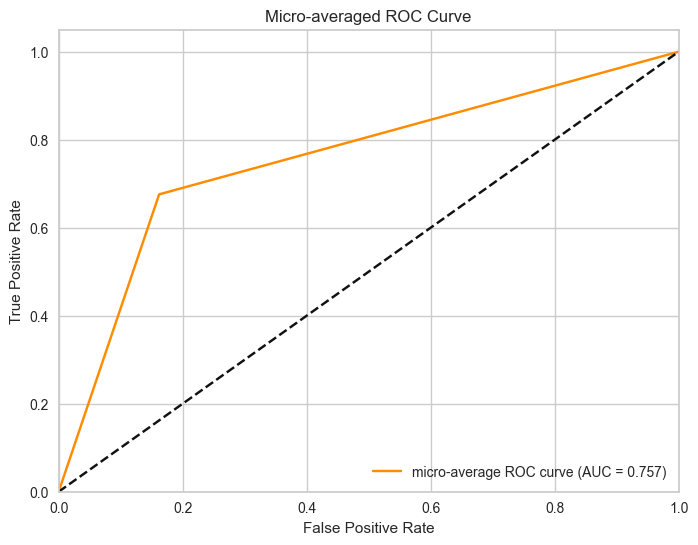

Micro-average ROC AUC: 0.756892221095795
Mean ROC AUC: 0.749984097623522
*** Logistic Regression (Lasso) ***


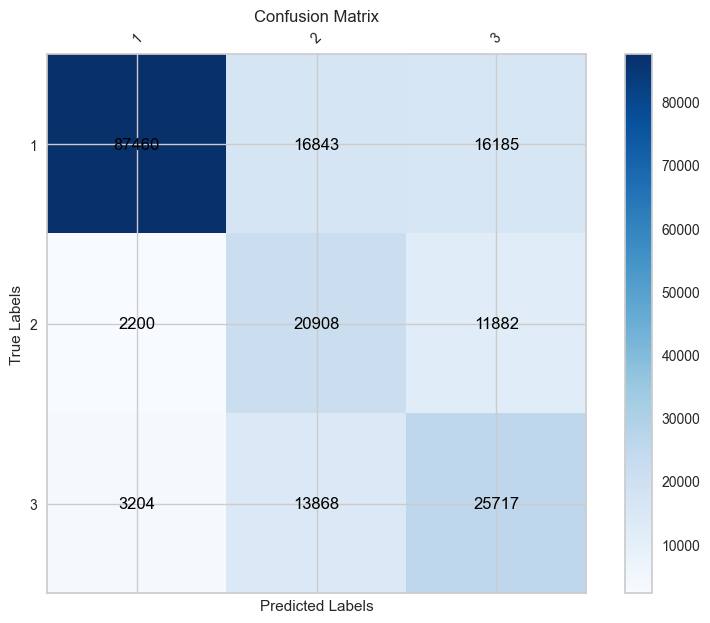

*** Classification Metrics ***
Precision = 0.7470164133395333
Recall = 0.6762850096082555
F1 Score = 0.6983850484988539
******************************


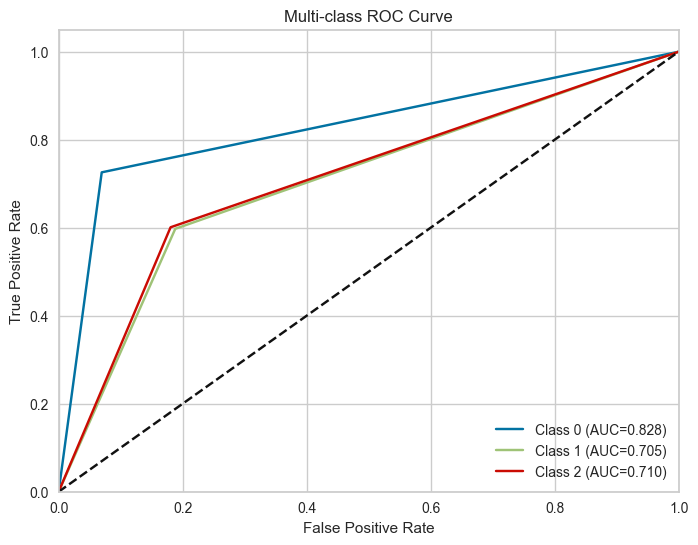

AUC scores for each class: {0: 0.8282012536940347, 1: 0.7047253759740685, 2: 0.7102491183559975}


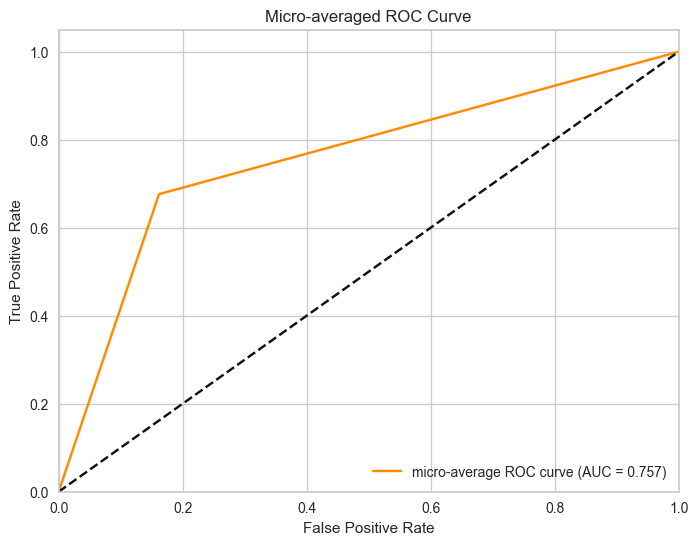

Micro-average ROC AUC: 0.7572137572061917
Mean ROC AUC: 0.7500973763075731
*** Logistic Regression (Elastic Net) ***


c:\Users\33667\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


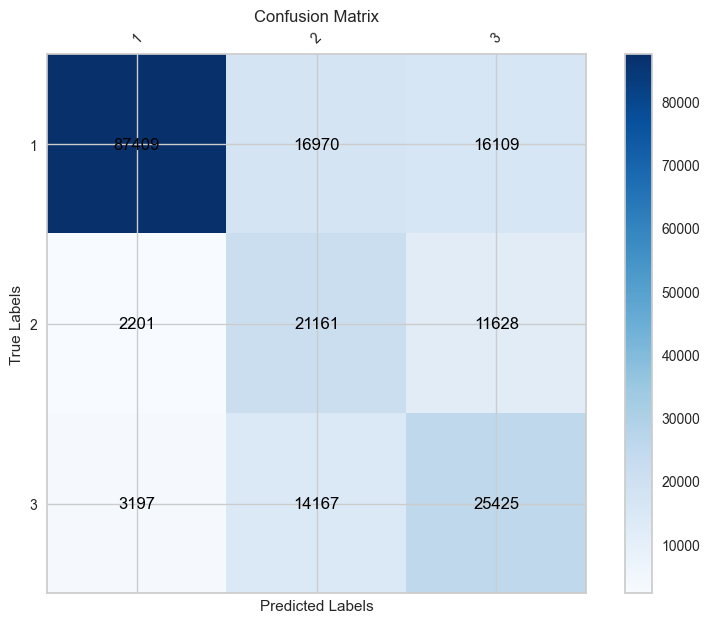

*** Classification Metrics ***
Precision = 0.7469816255654711
Recall = 0.675831076275931
F1 Score = 0.6980193667268224
******************************


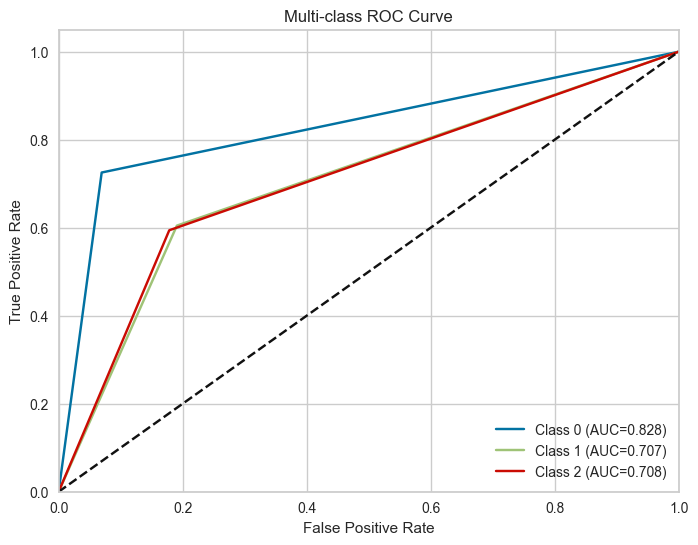

AUC scores for each class: {0: 0.8280281851831155, 1: 0.7070361630736167, 2: 0.7078982698545693}


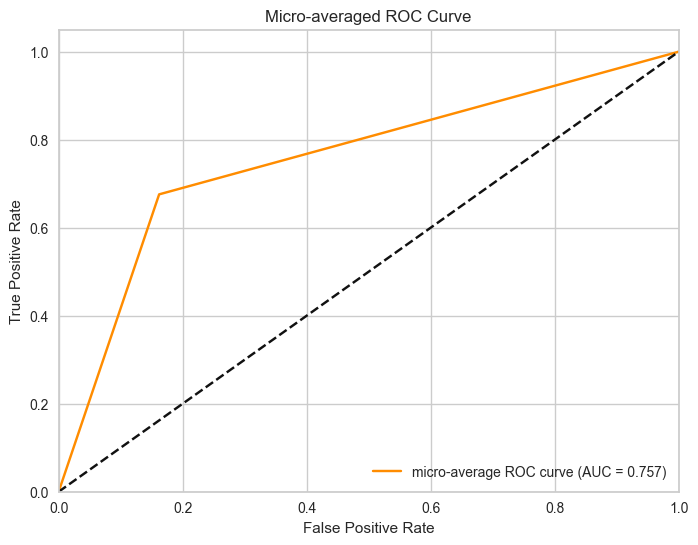

Micro-average ROC AUC: 0.7568733072069482
Mean ROC AUC: 0.7499589813295624


In [74]:
# Evaluate all models
for name, model_up in dict_models.items():
    if model_up != logreg:
        print('\n')
        print(f"*** {name} ***")
        model_up.fit(X_train_up, y_train_up)
        y_test_pred = model_up.predict(X_test_prep)
        evaluate_model_multiclass(y_test, y_test_pred, model.classes_)

### Courbe de validation

In [76]:
def plot_validation_curve(model, X_train, y_train, param_name, param_range, cv=5, scoring='f1', title=None):
    """
    Plot validation curve for a logistic regression model.

    Args:
        model: The logistic regression model to evaluate.
        X_train: Training data.
        y_train: Training labels.
        param_name: Name of the parameter to vary.
        param_range: Range of parameter values to evaluate.
        cv: Number of cross-validation folds.
        scoring: Scoring method to use.
        title: Title of the plot.
    """
    train_scores, val_scores = validation_curve(
        model, 
        X_train, 
        y_train, 
        param_name=param_name, 
        param_range=param_range, 
        cv=cv, 
        scoring=scoring
    )

    plt.figure(figsize=(12, 4))
    plt.plot(param_range, train_scores.mean(axis=1), label='train')
    plt.plot(param_range, val_scores.mean(axis=1), label='validation')
    plt.legend()
    if title is not None:
        plt.title(title)
    else:
        plt.title(f'Validation Curve for {model.__class__.__name__}')
    plt.ylabel('Score')
    plt.xlabel(f'{param_name} (Regularization parameter)')
    plt.show()

In [77]:
list_hyperparams = np.linspace(0.0001, 0.06, 30)

plot_validation_curve(
    LogisticRegression(penalty='l2', solver='liblinear'), 
    X_train_up, 
    y_train_up, 
    param_name='C', 
    param_range=list_hyperparams, 
    cv=5, 
    scoring='f1_micro',
    title="Courbe de validation pour la régression logistique Ridge"
)

_________

In [64]:
def plot_coefficients(model, feature_names, top_features=10, class_index=0):
    """
    Plot the model coefficients for a logistic regression model.
    
    Parameters:
    model : LogisticRegression
        Trained logistic regression model.
    feature_names : list
        List of feature names.
    top_features : int, default=10
        Number of top features to display.
    class_index : int, default=0
        Index of the class for which coefficients should be displayed.
    """
    # Select coefficients for the specified class
    coef = model.coef_[class_index]
    feature_names = np.array(feature_names)
    
    # Debug statements
    print(f"Total number of features: {len(feature_names)}")
    print(f"Number of coefficients: {len(coef)}")
    
    # Ensure that top_features does not exceed half the number of features
    if 2 * top_features > len(feature_names):
        top_features = len(feature_names) // 2
        print(f"Adjusted top_features to: {top_features}")
    
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # More debug statements
    print(f"Top positive coefficients indices: {top_positive_coefficients}")
    print(f"Top negative coefficients indices: {top_negative_coefficients}")
    print(f"Top coefficients indices: {top_coefficients}")
    
    # Create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    plt.xticks(np.arange(2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.xlabel("Feature")
    plt.ylabel("Coefficient")
    plt.title("Top {} Feature Coefficients for Class {}".format(2 * top_features, class_index))
    plt.show()


Total number of features: 22
Number of coefficients: 22
Top positive coefficients indices: [ 5 15  2 14 10 19 16 20  6 11]
Top negative coefficients indices: [18  9 17  1 13  7 12  8  0 21]
Top coefficients indices: [18  9 17  1 13  7 12  8  0 21  5 15  2 14 10 19 16 20  6 11]


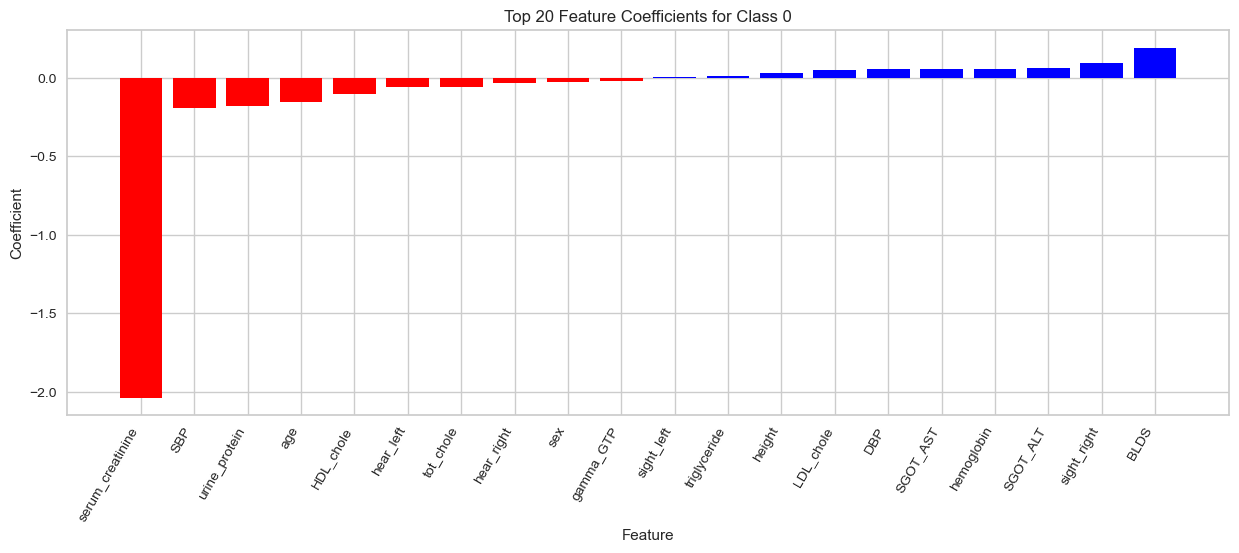

In [144]:
plot_coefficients(logreg, X.columns.to_list(), top_features=10)